In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow


In [ ]:
import tarfile
import scipy.io
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import glob

flowers_tar_path = '/content/drive/MyDrive/Colab Notebooks/102flowers.tar'
labels_mat_path = '/content/drive/MyDrive/Colab Notebooks/imagelabels.mat'

with tarfile.open(flowers_tar_path, 'r') as tar:
    tar.extractall()

labels = scipy.io.loadmat(labels_mat_path)['labels'][0]

image_paths = sorted(glob.glob('jpg/*.jpg'))

/tmp/ipython-input-1205109052.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


In [ ]:
scipy.io.loadmat(labels_mat_path)['labels'][0]


array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

In [ ]:
image_paths[0]

'jpg/image_00001.jpg'

In [ ]:


images = []
for img_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img = tf.keras.preprocessing.image.img_to_array(img)
    images.append(img)

images = np.array(images[:len(labels)])
labels = np.array(labels)

# Normalize the images
images = images / 255.0

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(103, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',  #it is not in hot encode -> sparse_categorical_crossentropy
        metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.0649 - loss: 4.2909 - val_accuracy: 0.1795 - val_loss: 3.3493
Epoch 2/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1897 - loss: 3.3090 - val_accuracy: 0.2912 - val_loss: 2.6882
Epoch 3/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.2938 - loss: 2.6948 - val_accuracy: 0.3974 - val_loss: 2.2930
Epoch 4/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.4598 - loss: 2.0005 - val_accuracy: 0.4634 - val_loss: 2.0500
Epoch 5/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6022 - loss: 1.4875 - val_accuracy: 0.5073 - val_loss: 1.8561
Epoch 6/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7098 - loss: 1.0040 - val_accuracy: 0.5098 - val_loss: 1.9214
Epoch 7/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7846 - loss: 0.7025 - val_accuracy: 0.5122 - val_loss: 2.1530
Epoch 8/20
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8460 - loss: 0.5171 - val_acc

In [ ]:
type(history)

keras.src.callbacks.history.History

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

52/52 - 0s - 9ms/step - accuracy: 0.4878 - loss: 2.9269

Test accuracy: 0.48778998851776123


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


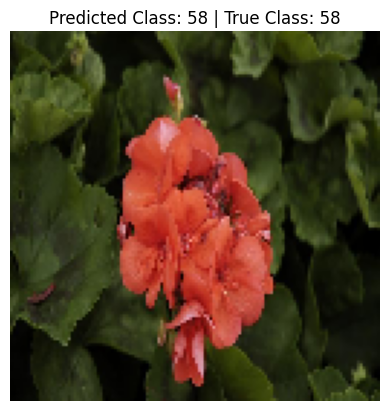

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


index_to_predict = 645

image_to_predict = X_test[index_to_predict]
true_label = y_test[index_to_predict]

image_for_model = np.expand_dims(image_to_predict, axis=0)

prediction = model.predict(image_for_model)


predicted_class = np.argmax(prediction)

plt.imshow(image_to_predict)

plt.title(f"Predicted Class: {predicted_class} | True Class: {true_label}")

plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import math


from tensorflow.keras.applications.resnet50 import preprocess_input

X_train_paths, X_val_paths, y_train, y_val = train_test_split(
    image_paths[:len(labels)],
    labels,
    test_size=0.2,
    random_state=42
)

batch_size = 32

def resnet_image_generator(image_paths, labels, batch_size):
    num_samples = len(image_paths)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)

        shuffled_paths = np.array(image_paths)[indices]
        shuffled_labels = np.array(labels)[indices]

        for i in range(0, num_samples, batch_size):
            batch_paths = shuffled_paths[i:i + batch_size]
            batch_labels = shuffled_labels[i:i + batch_size]

            batch_images = []
            for img_path in batch_paths:
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                batch_images.append(img_array)

            batch_images = np.array(batch_images)

            preprocessed_batch = preprocess_input(batch_images)

            yield (preprocessed_batch, np.array(batch_labels))

train_gen_resnet = resnet_image_generator(X_train_paths, y_train, batch_size)
val_gen_resnet = resnet_image_generator(X_val_paths, y_val, batch_size)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet.trainable = False

x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(103, activation='softmax')(x)

resnet_gen_model = Model(inputs=base_model_resnet.input, outputs=predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
resnet_gen_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

steps_per_epoch = len(X_train_paths) // batch_size
validation_steps = len(X_val_paths) // batch_size

resnet_gen_history = resnet_gen_model.fit(
    train_gen_resnet,
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen_resnet,
    validation_steps=validation_steps
)

Epoch 1/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 49s 187ms/step - accuracy: 0.6777 - loss: 1.2126 - val_accuracy: 0.8781 - val_loss: 0.4533
Epoch 2/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 28s 140ms/step - accuracy: 0.8409 - loss: 0.5432 - val_accuracy: 0.9093 - val_loss: 0.3280
Epoch 3/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 28s 136ms/step - accuracy: 0.8986 - loss: 0.3537 - val_accuracy: 0.9081 - val_loss: 0.3133
Epoch 4/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 30s 149ms/step - accuracy: 0.9174 - loss: 0.2764 - val_accuracy: 0.9153 - val_loss: 0.3070
Epoch 5/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 27s 131ms/step - accuracy: 0.9418 - loss: 0.1932 - val_accuracy: 0.9328 - val_loss: 0.2407
Epoch 6/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 40s 196ms/step - accuracy: 0.9489 - loss: 0.1629 - val_accuracy: 0.9228 - val_loss: 0.2448
Epoch 7/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - accuracy: 0.9563 - loss: 0.1338 - val_accuracy: 0.9303 - val_loss: 0.2352
Epoch 8/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 27s 130ms/step - accuracy: 0.9514 - loss: 0

In [ ]:
img = tf.keras.preprocessing.image.load_img(X_val_paths[56], target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
image_for_model = np.expand_dims(img_array, axis=0)



predicted_class = np.argmax(resnet_gen_model.predict(image_for_model))
print(f"actual class {predicted_class}")
print(f"actual class {y_val[56]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
actual class 78
actual class 78
